In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [3]:
train_csv = pd.read_csv("../input/sample-train-new/sample_train_new.csv")
train_csv.head()


,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category
0,0,02.01.2013,0,59,22154,999.00,1.0,37
1,1,03.01.2013,0,25,2552,899.00,1.0,58
2,2,05.01.2013,0,25,2552,899.00,-1.0,58
3,3,06.01.2013,0,25,2554,1709.05,1.0,58
4,4,15.01.2013,0,25,2555,1099.00,1.0,56


# Feature Engineering

1. Removing Outliers

In [4]:
# Removing item_cnt_day > 1000
print("[*] Dataframe length before removing rows{}".format(len(train_csv)))
train_csv.drop(train_csv[train_csv.item_cnt_day > 1000].index, inplace=True)
print(train_csv.head())
print("[*] Dataframe length after removing rows{}".format(len(train_csv)))

[*] Dataframe length before removing rows2935849
   Unnamed: 0        date  date_block_num  shop_id  item_id  item_price  \
0           0  02.01.2013               0       59    22154      999.00   
1           1  03.01.2013               0       25     2552      899.00   
2           2  05.01.2013               0       25     2552      899.00   
3           3  06.01.2013               0       25     2554     1709.05   
4           4  15.01.2013               0       25     2555     1099.00   

   item_cnt_day  item_category  
0           1.0             37  
1           1.0             58  
2          -1.0             58  
3           1.0             58  
4           1.0             56  
[*] Dataframe length after removing rows2935848


In [5]:
# Removing items with price > 50K
print("[*] Dataframe length before removing rows{}".format(len(train_csv)))
train_csv.drop(train_csv[train_csv.item_price > 50000].index, inplace=True)
print(train_csv.head())
print("[*] Dataframe length after removing rows{}".format(len(train_csv)))

[*] Dataframe length before removing rows2935848
   Unnamed: 0        date  date_block_num  shop_id  item_id  item_price  \
0           0  02.01.2013               0       59    22154      999.00   
1           1  03.01.2013               0       25     2552      899.00   
2           2  05.01.2013               0       25     2552      899.00   
3           3  06.01.2013               0       25     2554     1709.05   
4           4  15.01.2013               0       25     2555     1099.00   

   item_cnt_day  item_category  
0           1.0             37  
1           1.0             58  
2          -1.0             58  
3           1.0             58  
4           1.0             56  
[*] Dataframe length after removing rows2935845


In [6]:
# converting the date column and dropping the day part becuse we are interested only with the month
train_csv['date'] = pd.to_datetime(train_csv['date'], dayfirst=True)
train_csv['date'] = train_csv['date'].apply(lambda x: x.strftime('%Y-%m'))
train_csv.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category
0,0,2013-01,0,59,22154,999.00,1.0,37
1,1,2013-01,0,25,2552,899.00,1.0,58
2,2,2013-01,0,25,2552,899.00,-1.0,58
3,3,2013-01,0,25,2554,1709.05,1.0,58
4,4,2013-01,0,25,2555,1099.00,1.0,56


In [7]:
train_csv.to_csv("/kaggle/working/train_csv_featured.csv")

In [9]:
# groupby item id and create lag features
# grouping by itemid and creating a dataset where we have as many column as we have dates and there is the value for item_cnt_day for that 
# respesctive item_id

df = train_csv.groupby(['date','item_id','shop_id']).sum()
df = df.pivot_table(index=['shop_id','item_id'], columns='date', values='item_cnt_day', fill_value=0)
df.reset_index(inplace=True)
df.to_csv("/kaggle/working/train_csv_featured_date.csv")
df.head()


date,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# getting some intuition the new df

len_of_df = len(df)
num_columns = len(df.columns)
last_column = df.columns[-1]

print("[*] Length of df : {}".format(len_of_df))
print("[*] Columns df : {}".format(num_columns))
print("[*] last_column df : {}".format(last_column))

[*] Length of df : 424122
[*] Columns df : 36
[*] last_column df : 2015-10


In [12]:
# preparing data to be used in model (splitting and dropping unnecessary columns)#

Y_train = df[df.columns[-1]]
X_train = df.drop([df.columns[-1]], axis = 1)
#X_train = X_train.drop(['date'], axis = 1)

print("[*] Shape of X_train : {}".format(X_train.shape))
print("[*] Shape of Y_train : {}".format(Y_train.shape))

# splitting the data
X_train_split, X_valid_split, Y_train_split, Y_valid_split = train_test_split( X_train, Y_train, test_size = 0.2, random_state = 42)
print("[*] Shape of X_train_split : {}".format(X_train_split.shape))
print("[*] Shape of X_valid_split : {}".format(X_valid_split.shape))
print("[*] Shape of Y_train_split : {}".format(Y_train_split.shape))
print("[*] Shape of Y_valid_split : {}".format(Y_valid_split.shape))



[*] Shape of X_train : (424122, 35)
[*] Shape of Y_train : (424122,)
[*] Shape of X_train_split : (339297, 35)
[*] Shape of X_valid_split : (84825, 35)
[*] Shape of Y_train_split : (339297,)
[*] Shape of Y_valid_split : (84825,)


# Implementing Linear Regression as a 1st step

In [13]:
X_train_split = X_train_split.values
Y_train_split = Y_train_split.values
X_valid_split = X_valid_split.values
Y_valid_split = Y_valid_split.values


reg = LinearRegression()
reg.fit(X_train_split, Y_train_split)
score = reg.score(X_train_split, Y_train_split)
train_error = mean_squared_error(Y_train_split, reg.predict(X_train_split))
valid_error = mean_squared_error(Y_valid_split, reg.predict(X_valid_split))

print("[*] Score of determination : {}".format(score))
print("[*] Train_error : {}".format(train_error))
print("[*] validation error : {}".format(valid_error))

[*] Score of determination : 0.5319748721106841
[*] Train_error : 1.9185805449428248
[*] validation error : 2.847235586872774


# Random Forest as a Second algorithm

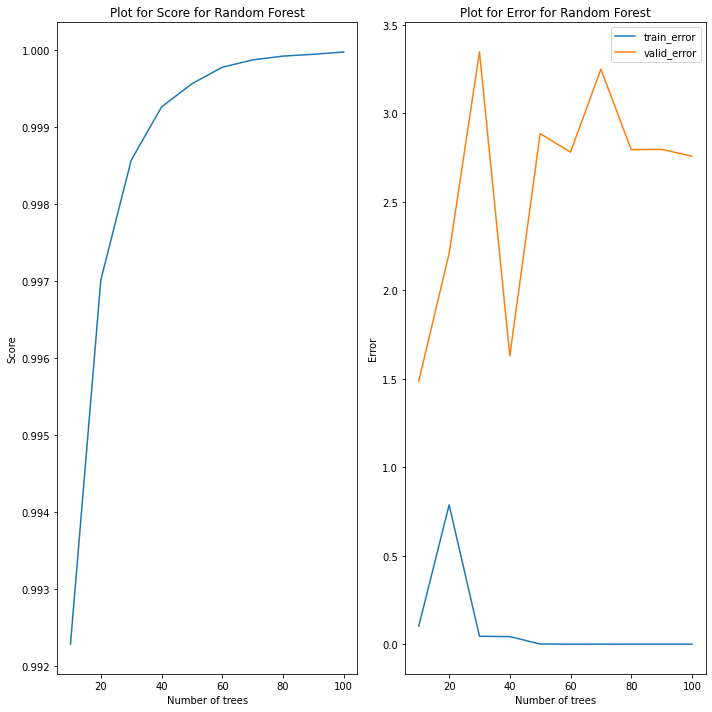

In [14]:
# Plotting how different number of trees decreases the train and validation error
from sklearn.ensemble import RandomForestClassifier
number_of_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_error = []
validation_error = []
score = []
for i in number_of_trees:
    clf = RandomForestClassifier(n_estimators = i, random_state = 0)
    clf.fit(X_train_split, Y_train_split)
    score.append(clf.score(X_train_split, Y_train_split))
    train_error.append(mean_squared_error(Y_train_split, clf.predict(X_train_split)))
    validation_error.append(mean_squared_error(Y_valid_split, clf.predict(X_valid_split)))
    
fig, axes = plt.subplots(1,2, figsize = (10, 10))
axes[0].plot(number_of_trees, score)
axes[0].set_title("Plot for Score for Random Forest")
axes[0].set_xlabel("Number of trees")
axes[0].set_ylabel("Score")

axes[1].plot(number_of_trees, train_error)
axes[1].plot(number_of_trees, validation_error)
axes[1].legend(["train_error", "valid_error"])
axes[1].set_title("Plot for Error for Random Forest")
axes[1].set_xlabel("Number of trees")
axes[1].set_ylabel("Error")

fig.tight_layout()

From the above 2 graphs it is clear that the number of trees between 40 and 60 is a good estimate.

In [14]:
# Testing with 40 number of trees
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 43)
RF.fit(X_train_split, Y_train_split)
score_40 = RF.score(X_train_split, Y_train_split)
train_error_40 = mean_squared_error(Y_train_split, RF.predict(X_train_split))
valid_error_40 = mean_squared_error(Y_valid_split, RF.predict(X_valid_split))
print("[*] Score 43 : {}".format(score_40))
print("[*] Train error 43 : {}".format(train_error_40))
print("[*] Valid error 43 : {}".format(valid_error_40))

[*] Score 43 : 0.9995195949271583
[*] Train error 43 : 0.0034866208660848754
[*] Valid error 43 : 1.6252402004126143


In [15]:
test_csv = pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")
test_csv.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [16]:
test_csv=pd.merge(test_csv, df, on=['shop_id','item_id'], how='left')
display(test_csv.shape)
test_csv = test_csv.fillna(0)
test_csv.head()

(214200, 37)

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# predict and save the prediction result in a dictionary
test_csv = test_csv.drop(['ID'], axis = 1)
test_csv.head()

,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
test_csv = test_csv.drop(['2015-10'], axis = 1)
print("[*] Number of columns : {}".format(len(test_csv.columns)))
test_csv.head()

[*] Number of columns : 35


,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# predicting the test set
submission = pd.read_csv("../input/competitive-data-science-predict-future-sales/sample_submission.csv")
prediction = RF.predict(test_csv)
prediction = prediction.tolist()
submission['item_cnt_month'] = prediction
submission.to_csv("/kaggle/working/submission.csv", index = False)
submission.head()

,ID,item_cnt_month
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1
